In [1]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import to_categorical, Sequence
from keras.preprocessing import image
from keras import regularizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
%matplotlib inline


In [2]:
import pandas as pd
train = pd.read_csv(r'C:\Users\acoun\Desktop\ImageClassfication\Multi_Label\train.csv')   
#train.info()     
train.shape



(7254, 27)

In [3]:
#create the model
height = 400
width = 400
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(height,width,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(25, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 198, 198, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 93, 93, 64)        5

In [4]:
#optimizer = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer= 'adam' , loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
start = 3000
end = 4500
ranges = start - end
train_set = train[start : end]
category_columns = train_set.columns.drop(['Id', 'Genre'])
sum_genre = train_set[category_columns].sum()
df_movies_per_genre = pd.DataFrame({'Genre':category_columns, 'Total': sum_genre})

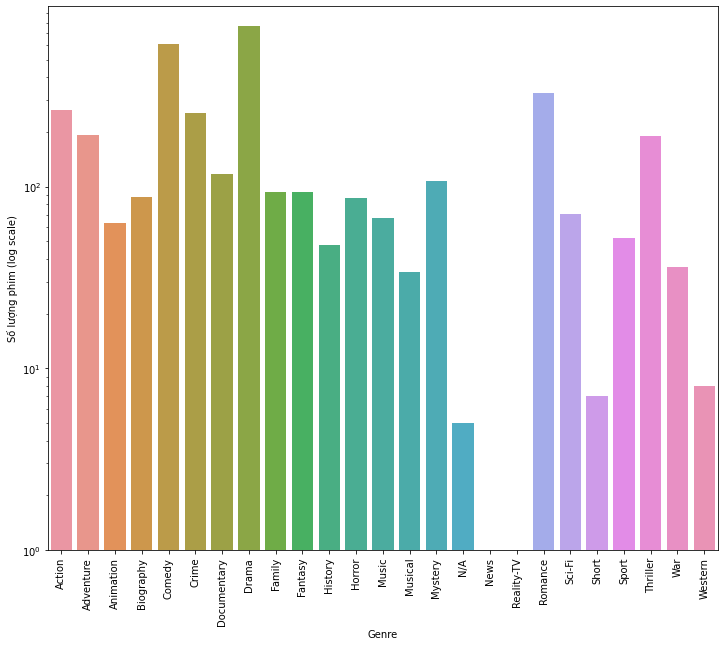

In [6]:
import seaborn as sns
f, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.barplot(data=df_movies_per_genre, x='Genre', y='Total', axes=ax)
ax.set(yscale='log', ylim=(1, ranges), ylabel='Số lượng phim (log scale)')
plt.xticks(rotation=90)
plt.show()

In [7]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))

In [8]:
train_image = []

for i in tqdm(range(start , end)):
    img = image.load_img('Images/'+train['Id'][i]+'.jpg',target_size=(height,width,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)
Y = y[start : end, :]

100%|██████████| 1500/1500 [00:04<00:00, 341.46it/s]


In [9]:
Y.shape

(1500, 25)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.15)

# from skmultilearn.model_selection import iterative_train_test_split
# X_train, Y_train, X_test , Y_test = iterative_train_test_split(X, Y, test_size = 0.15)

In [16]:
epoch = 15 
history = model.fit(X_train, Y_train, epochs=epoch, validation_split=0.15, batch_size = 10)


Epoch 1/15
  3/109 [..............................] - ETA: 2:09 - loss: 0.2387 - accuracy: 0.4000

KeyboardInterrupt: 

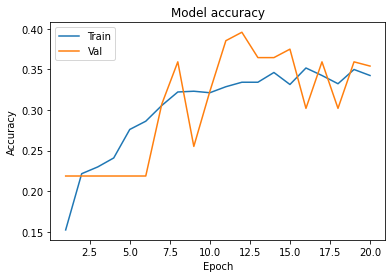

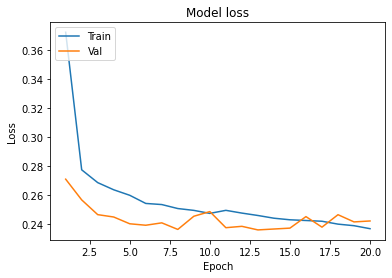

In [12]:
def plot_learningCurve(history, epoch):
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(history, epoch)

In [13]:
results = model.evaluate(X_test, Y_test, batch_size = 32)
print("test loss, test acc:", results)

8/8 [==============================] - 4s 399ms/step - loss: 0.2363 - accuracy: 0.3644
test loss, test acc: [0.23634032905101776, 0.36444443464279175]


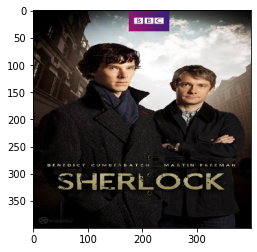

In [14]:
img = image.load_img('sherlock.jpg',target_size=(height,width,3))
img = image.img_to_array(img)
img = img/255
plt.imshow(img)

In [15]:

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,height,width,3))
top = np.argsort(proba[0])[:-7:-1]
for i in range(4):
    print("{}".format(classes[top[i]])+" ({:.9})".format(proba[0][top[i]]))


Drama (0.506886959)
Comedy (0.298220932)
Romance (0.242097348)
Adventure (0.224835813)
